In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# load the dataset 

sd_df = pd.read_csv("spotify_data_dictionary.csv")
df = pd.read_csv("spotify_history.csv")

# Data Preprocessing & Cleaning

In [3]:
# checking missing values 

print("missing values : ")
df.isnull().sum()

missing values : 


spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [4]:
# handle missing values 

df = df.dropna()

In [5]:
print("check for duplicates : ")
df.duplicated().sum()

check for duplicates : 


np.int64(1185)

In [6]:
# remove duplicates 
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [7]:
# Check and Convert Data Types
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [8]:
# Convert Data Types

df['ts'] = pd.to_datetime(df['ts'])     # object -> datetime format 
df['ms_played'] = pd.to_numeric(df['ms_played'], errors='coerce')        # if ms_played is object then we can use this command 

In [9]:
# Extract Time-based Features 
df['time'] = df['ts'].dt.time   # hour extraction 
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.dayofweek
df['day'] = df['ts'].dt.day
df['month'] = df['ts'].dt.month
df['year'] = df['ts'].dt.year

In [10]:
df.sample()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,time,hour,day_of_week,day,month,year
66747,5jRQvcl66ovRTjUwzXziZA,2020-02-01 17:58:39,android,253866,Midnight Special,Creedence Clearwater Revival,Willy And The Poor Boys,trackdone,trackdone,True,False,17:58:39,17,5,1,2,2020


In [11]:
# Remove rows where ms_played is less than or equal to zero 
df = df[df['ms_played'] > 0]

In [12]:
# Verify the final dataframe 
print("\nDataset after preprocessing:")
df.info()  # Overview of the dataframe after preprocessing



Dataset after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 144936 entries, 0 to 149859
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  144936 non-null  object        
 1   ts                 144936 non-null  datetime64[ns]
 2   platform           144936 non-null  object        
 3   ms_played          144936 non-null  int64         
 4   track_name         144936 non-null  object        
 5   artist_name        144936 non-null  object        
 6   album_name         144936 non-null  object        
 7   reason_start       144936 non-null  object        
 8   reason_end         144936 non-null  object        
 9   shuffle            144936 non-null  bool          
 10  skipped            144936 non-null  bool          
 11  time               144936 non-null  object        
 12  hour               144936 non-null  int32         
 13  day_of_week        

# EDA

In [13]:
# Generate summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

# Step 3: Generate value counts for categorical columns (track, artist, etc.)
print("\nValue counts for categorical columns:")
print(df['track_name'].value_counts().head(10))  # Top 10 most frequent tracks
print(df['artist_name'].value_counts().head(10))  # Top 10 most frequent artists

Summary statistics for numerical columns:
                                  ts     ms_played           hour  \
count                         144936  1.449360e+05  144936.000000   
mean   2020-05-01 04:02:05.779095296  1.311542e+05      11.802961   
min              2013-07-08 02:44:34  1.000000e+00       0.000000   
25%    2018-02-27 20:04:15.750000128  3.364000e+03       3.000000   
50%       2020-08-15 23:43:11.500000  1.443730e+05      14.000000   
75%    2022-01-17 06:48:36.249999872  2.199850e+05      20.000000   
max              2024-12-15 23:06:25  1.561125e+06      23.000000   
std                              NaN  1.175047e+05       8.227951   

         day_of_week            day          month           year  
count  144936.000000  144936.000000  144936.000000  144936.000000  
mean        2.947618      15.234676       6.922007    2019.798552  
min         0.000000       1.000000       1.000000    2013.000000  
25%         1.000000       7.000000       4.000000    2018.00000

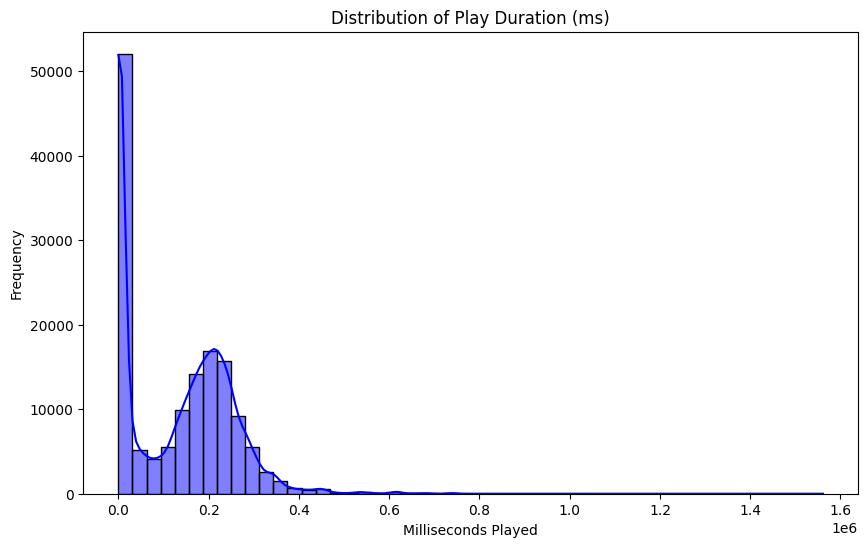

In [14]:
# Distribution of Numerical Columns

# Plot distribution of 'ms_played'
plt.figure(figsize=(10, 6))
sns.histplot(df['ms_played'], bins=50, kde=True, color='blue')
plt.title('Distribution of Play Duration (ms)')
plt.xlabel('Milliseconds Played')
plt.ylabel('Frequency')
plt.show()

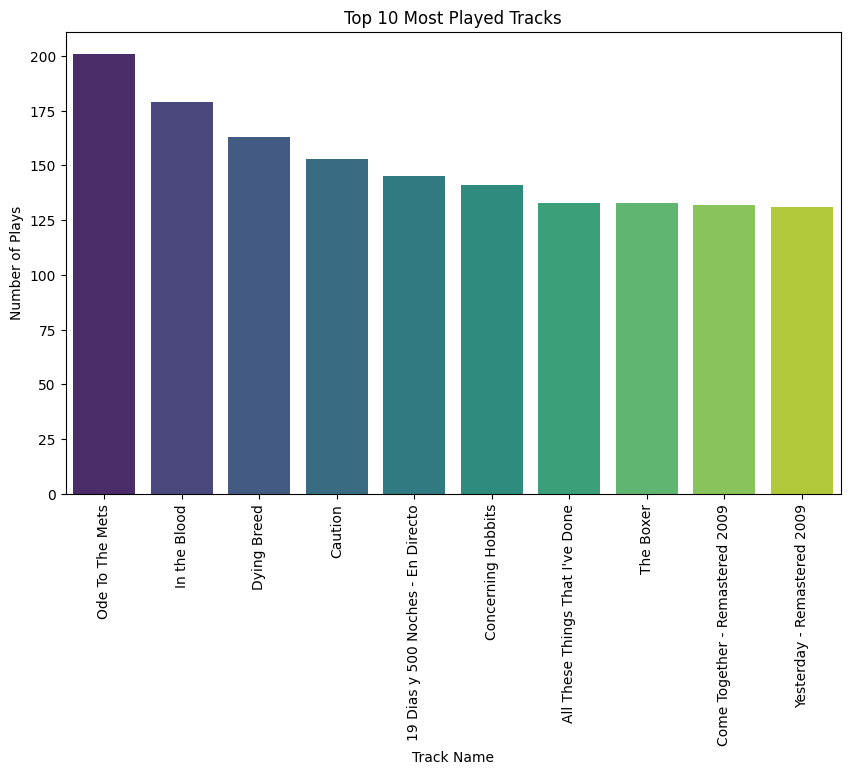

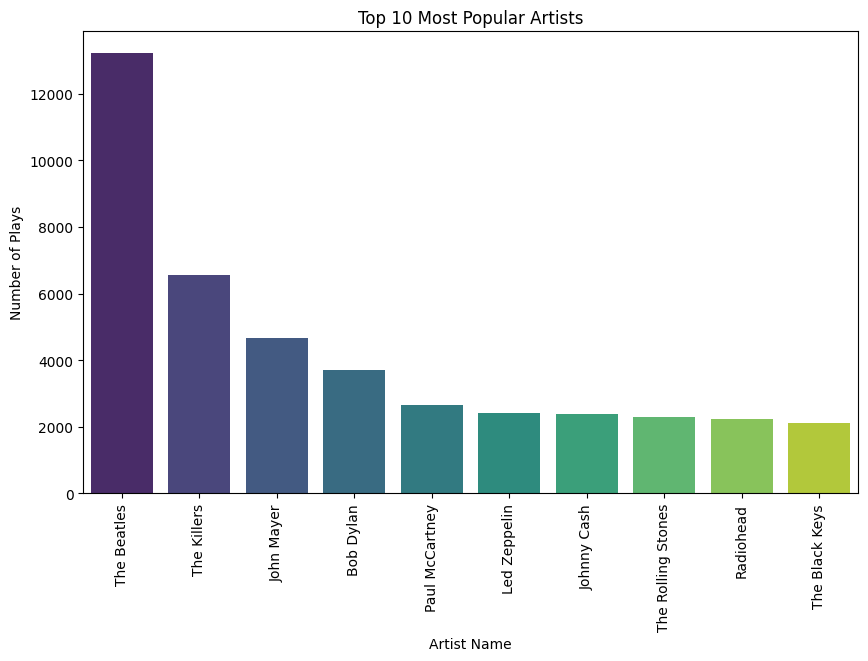

In [15]:
# Step 6: Top 10 most played tracks
track_counts = df['track_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=track_counts.index, y=track_counts.values, palette='viridis', hue=track_counts.index)
plt.xticks(rotation=90)
plt.title('Top 10 Most Played Tracks')
plt.xlabel('Track Name')
plt.ylabel('Number of Plays')
plt.show()

# Step 7: Top 10 most popular artists
artist_counts = df['artist_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette='viridis', hue=artist_counts.index)
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Artist Name')
plt.ylabel('Number of Plays')
plt.show()

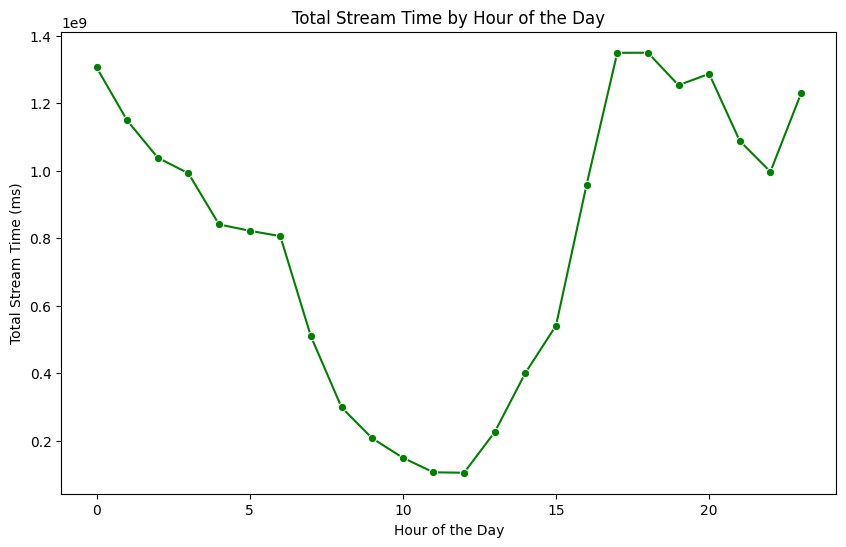

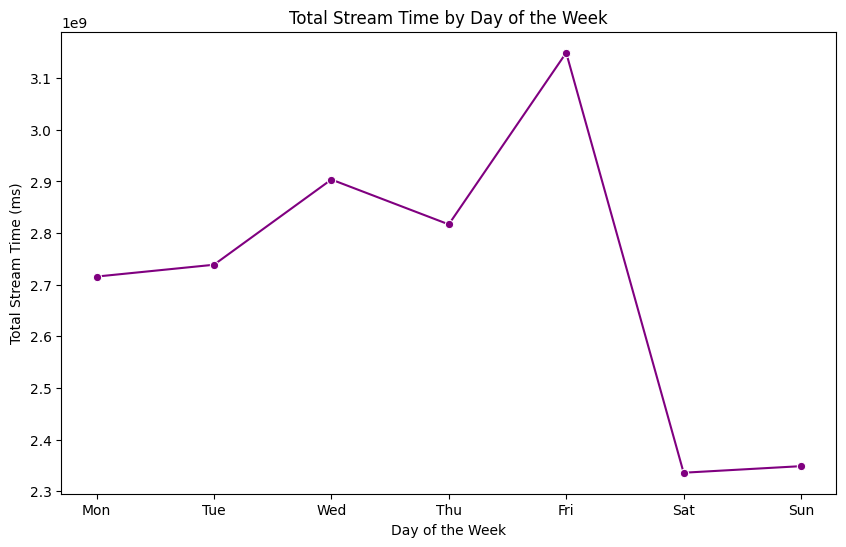

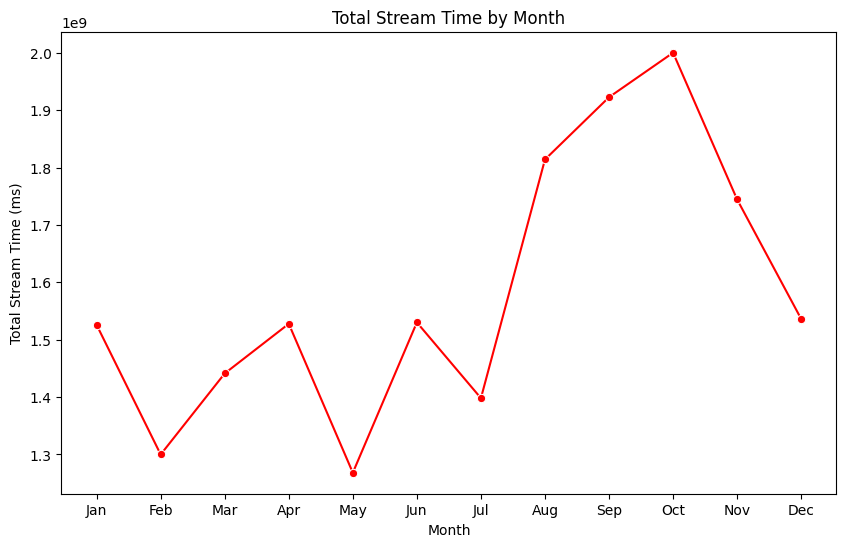

In [17]:
# Step 8: Hourly play trends
hourly_play_time = df.groupby('hour')['ms_played'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_play_time.index, y=hourly_play_time.values, marker='o', color='green')
plt.title('Total Stream Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Stream Time (ms)')
plt.show()

# Step 9: Day of week play trends (0=Monday, 6=Sunday)
day_of_week_play_time = df.groupby('day_of_week')['ms_played'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_of_week_play_time.index, y=day_of_week_play_time.values, marker='o', color='purple')
plt.title('Total Stream Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Stream Time (ms)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Step 10: Monthly play trends
monthly_play_time = df.groupby('month')['ms_played'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_play_time.index, y=monthly_play_time.values, marker='o', color='red')
plt.title('Total Stream Time by Month')
plt.xlabel('Month')
plt.ylabel('Total Stream Time (ms)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

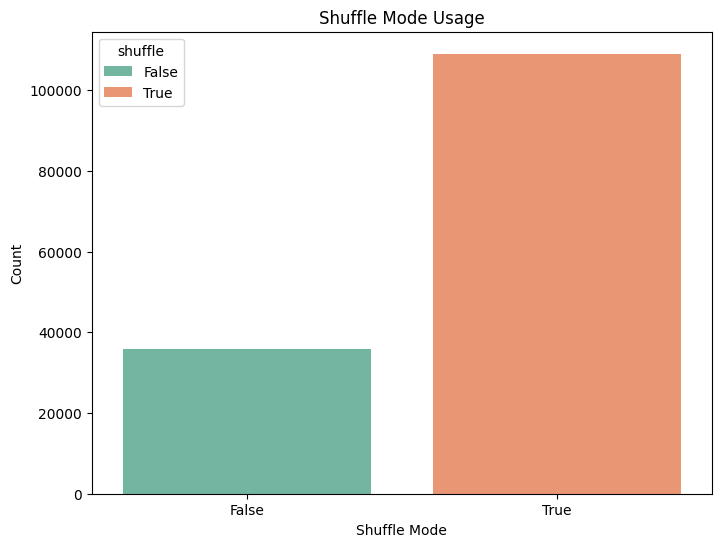

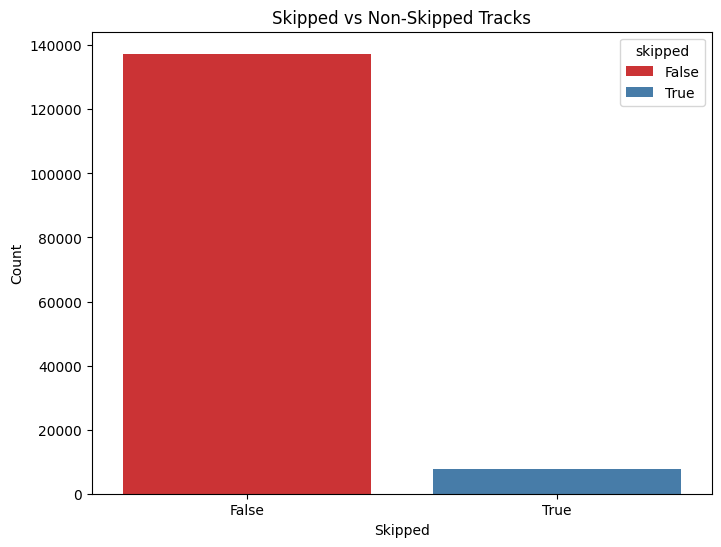

In [19]:
# Step 11: Shuffle Mode Usage
shuffle_counts = df['shuffle'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=shuffle_counts.index, y=shuffle_counts.values, palette='Set2', hue=shuffle_counts.index)
plt.title('Shuffle Mode Usage')
plt.xlabel('Shuffle Mode')
plt.ylabel('Count')
plt.show()

# Step 12: Skipped Tracks
skip_counts = df['skipped'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=skip_counts.index, y=skip_counts.values, palette='Set1', hue=skip_counts.index)
plt.title('Skipped vs Non-Skipped Tracks')
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.show()

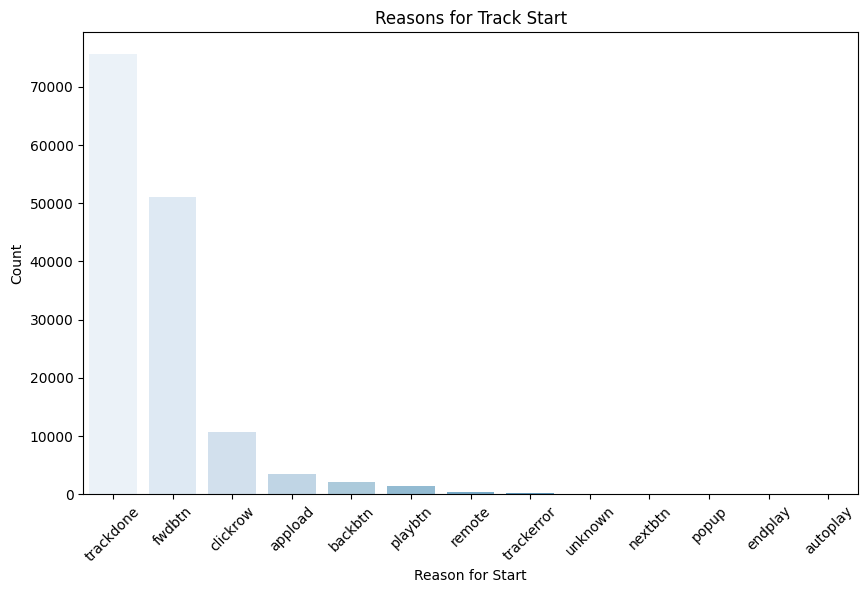

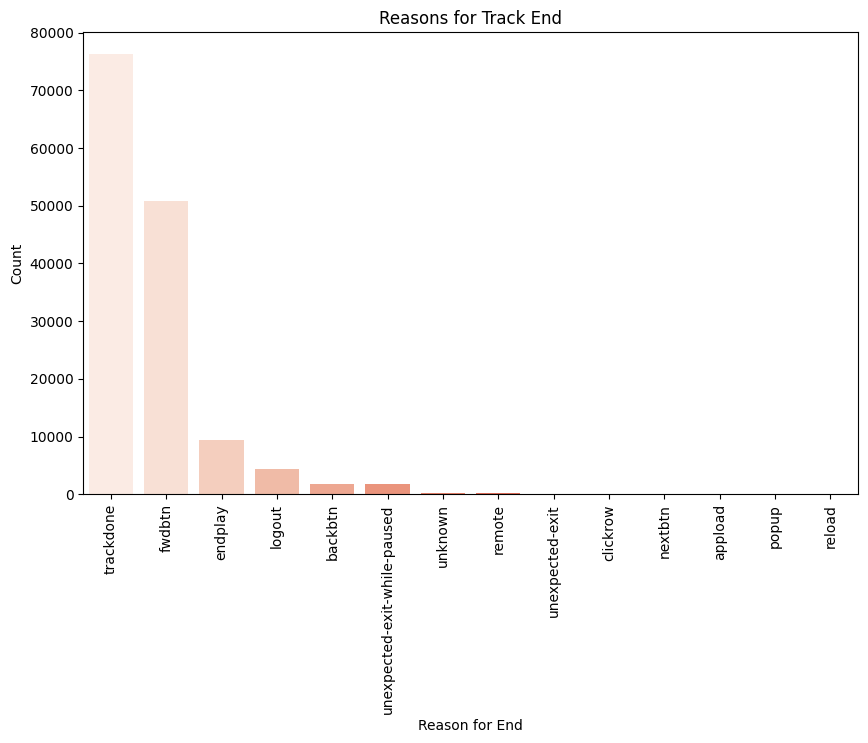

In [21]:
# Step 13: Reasons for Track Start
start_reasons = df['reason_start'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=start_reasons.index, y=start_reasons.values, palette='Blues', hue=start_reasons.index)
plt.title('Reasons for Track Start')
plt.xlabel('Reason for Start')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 14: Reasons for Track End
end_reasons = df['reason_end'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=end_reasons.index, y=end_reasons.values, palette='Reds', hue=end_reasons.index)
plt.title('Reasons for Track End')
plt.xlabel('Reason for End')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

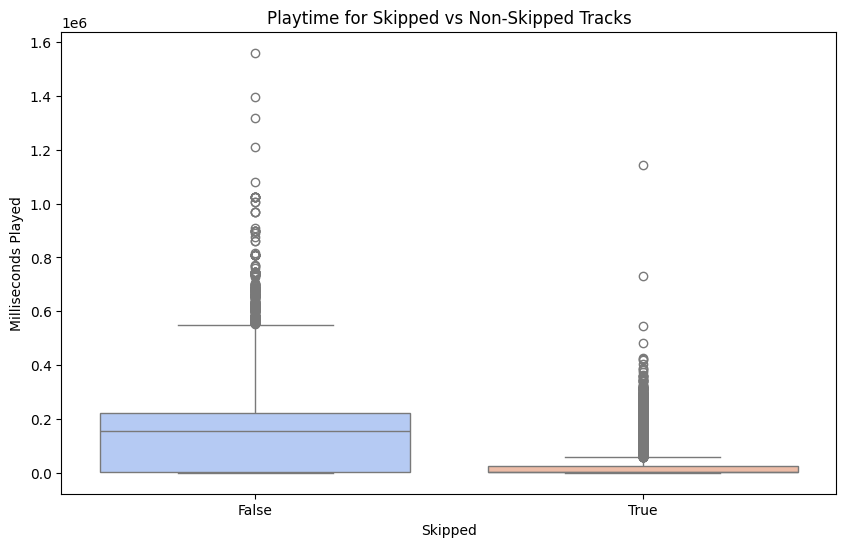

In [23]:
# Assign 'x' to 'hue' and set 'legend=False'
plt.figure(figsize=(10, 6))
sns.boxplot(x='skipped', y='ms_played', data=df, hue='skipped', palette='coolwarm', legend=False)
plt.title('Playtime for Skipped vs Non-Skipped Tracks')
plt.xlabel('Skipped')
plt.ylabel('Milliseconds Played')
plt.show()